In [5]:
h = 0.001
k = 2
x0 = 5
x(t) = (1+h*k)^(t/h) * x0

x (generic function with 1 method)

In [6]:
x(1)

36.87156195177308

In [7]:
h = 0.0001
x(1)

36.93789316226528

In [4]:
ℯ

ℯ = 2.7182818284590...

In [8]:
5*ℯ^k

36.945280494653254

In [9]:
x2(t) = x0/(1-h*k)^(t/h)

x2 (generic function with 1 method)

In [11]:
x2(1)

36.952671275251305

In [13]:
[(x(t)-x2(t)) for t=1:10]

10-element Array{Float64,1}:
      -0.014778112986022052
      -0.21839262197170228
      -2.4205731482461488
     -23.847669460765246
    -220.26472843247757
   -1953.0583173095947
  -16836.46895772498
 -142177.86216519773
      -1.1818803899732828e6
      -9.703313158658981e6

In [15]:
]add DifferentialEquations

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %Fetching: [=====>                                   ]  12.1 %>                             ]  25.1 %                           ]  31.5 % [==================>                      ]  44.6 %]  57.6 %Fetching: [=========================>               ]  61.6 %>          ]  74.6 % %>   ]  91.2 %

  Resolving package versions...
  Installed Opus_jll ─────────────── v1.3.1+1
  Installed libvorbis_jll ────────── v1.3.6+3
  Installed Formatting ───────────── v0.4.1
  Installed UnPack ───────────────── v0.1.0
  Installed FunctionWrappers ─────── v1.1.1
  Installed BoundaryValueDiffEq ──── v2.5.0
  Installed DifferentialEquations ── v6.13.0
  Installed BandedMatrices ───────── v0.15.6
  Installed DimensionalPlotRecipes ─ v1.2.0
  Installed ZygoteRules ──────────── v0.2.0
  Installed METIS_jll ────────────── v5.1.0+3
  Installed ArrayLayouts ─────────── v0.2.6
  Installed DiffEqCallbacks ──────── v2.13.1
  Installed Inflate ──────────────── v0.1.2
  Installed FillArrays ───────────── v0.8.8
  Installed LightGraphs ──────────── v1.3.2
  Installed SafeTestsets ─────────── v0.0.1
  Installed FiniteDiff ───────────── v2.3.0
  Installed DiffEqJump ───────────── v6.6.1
  Installed NameResolution ───────── v0.1.3
  Installed SteadyStateDiffEq ────── v1.5.0
  Installed LoggingExtras ─────────

In [16]:
using DifferentialEquations, Plots

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1260
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


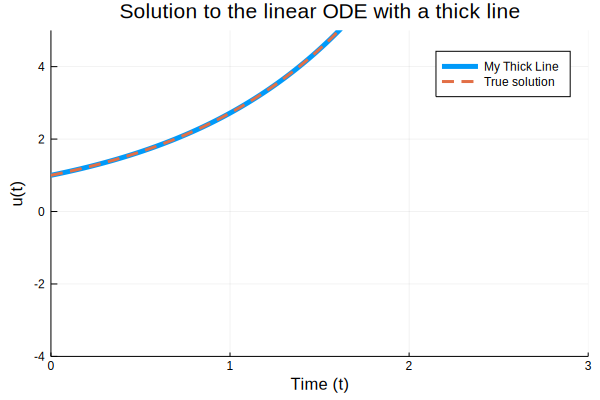

In [19]:
x0 = 1.0
k = 1.0

f(x,k,t) = k*x   #x'(t) = f(x,k,t)
tspan = (0.0, 3.0)

prob = ODEProblem(f, x0, tspan, k)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)

plot(sol, linewidth=5, title="Solution to the linear ODE with a thick line",
        xaxis = "Time (t)", yaxis = "u(t)", label = "My Thick Line")

plot!(sol.t, t->x0*exp(k*t), lw=3, ls=:dash, label="True solution", ylim=(-4,5))

In [21]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4801875253597402317\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4257550547215221076\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4801875253597402317\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [22]:
@manipulate for k = -3:0.1:1, x0 = -3:0.1:3
    f(x,k,t) = k*x   #x'(t) = f(x,k,t)
    tspan = (0.0, 3.0)

    prob = ODEProblem(f, x0, tspan, k)
    sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)

    plot(sol, linewidth=5, title="Solution to the linear ODE with a thick line",
        xaxis = "Time (t)", yaxis = "u(t)", label = "My Thick Line")

    plot!(sol.t, t->x0*exp(k*t), lw=3, ls=:dash, label="True solution", ylim=(-4,5))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 41,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
21, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/lydiayu/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/all.js"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/InteractBase/NMcus/src/../assets/style.css"), Asset("css", nothing, "/Users/lydiayu/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000013c498490, Task (runnable) @0x000000013c498490), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-3.0\",\"-2.9\",\"-2.8\",\"-2.7\",\"-2.6\",\"-2.5\",\"-2.4\",\"-2.3\",\"-2.2\",\"-2.1\",\"-2.0\",\"-1.9\",\"-1.8\",\"-1.7\",\"-1.6\",\"-1.5\",\"-1.4\",\"-1.3\",\"-1.2\",\"-1.1\",\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"-0.5\",\"-0.4

In [ ]:
using ModelingToolkit, DifferentialEquations
@parameters t,k
@variables x(t)
@derivatives D'-t

eqs = [D(x - -k)]